In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       398
           1       1.00      0.96      0.98       402

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



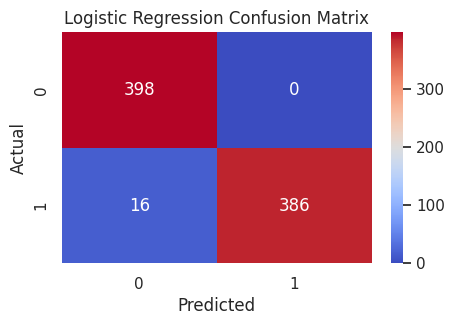


=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       402

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



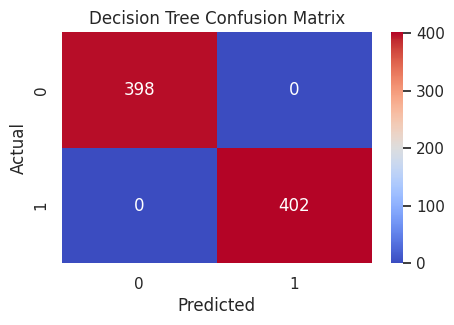


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       402

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



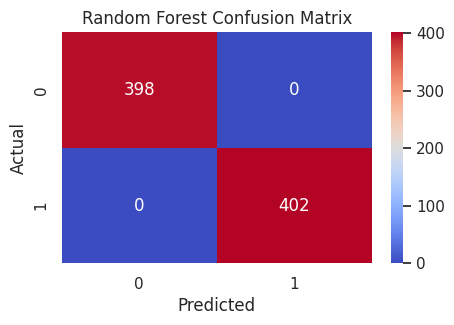


=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       398
           1       1.00      0.89      0.94       402

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



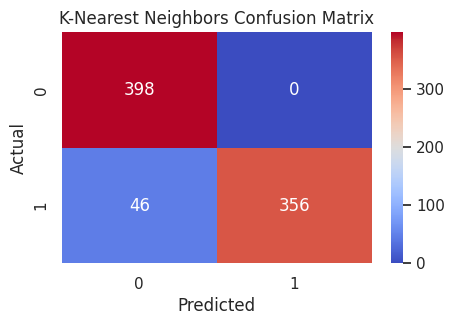


=== Support Vector Machine ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       398
           1       1.00      0.98      0.99       402

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



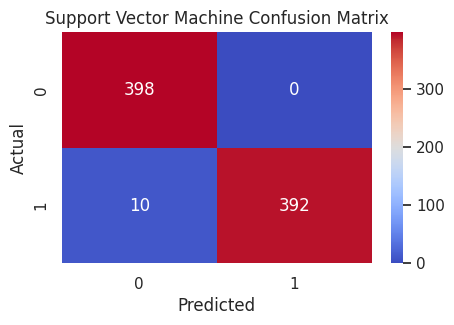


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       398
           1       1.00      0.96      0.98       402

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



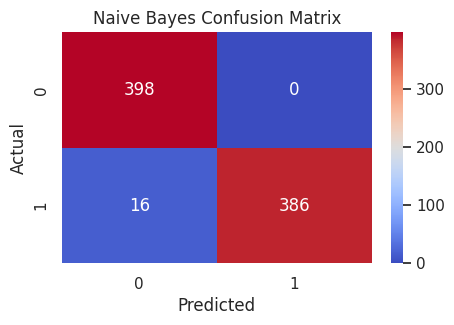


=== Ridge Classifier ===
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       398
           1       1.00      0.77      0.87       402

    accuracy                           0.89       800
   macro avg       0.91      0.89      0.88       800
weighted avg       0.91      0.89      0.88       800



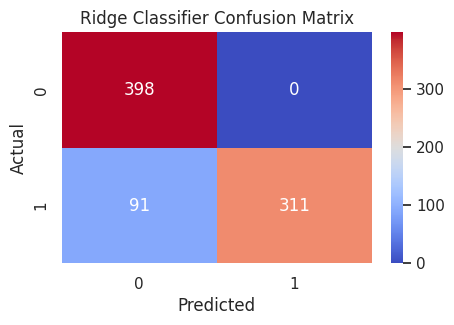


=== Passive Aggressive Classifier ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       398
           1       1.00      0.95      0.98       402

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



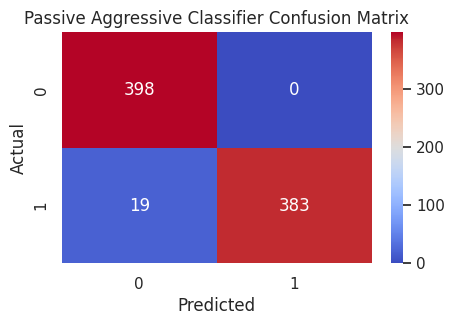


=== Perceptron ===
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       398
           1       0.81      0.98      0.89       402

    accuracy                           0.88       800
   macro avg       0.89      0.87      0.87       800
weighted avg       0.89      0.88      0.87       800



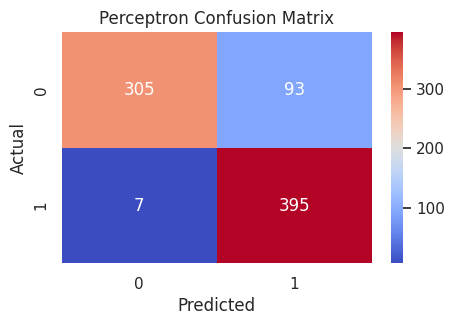


=== Linear Discriminant Analysis ===
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       398
           1       1.00      0.77      0.87       402

    accuracy                           0.89       800
   macro avg       0.91      0.89      0.88       800
weighted avg       0.91      0.89      0.88       800



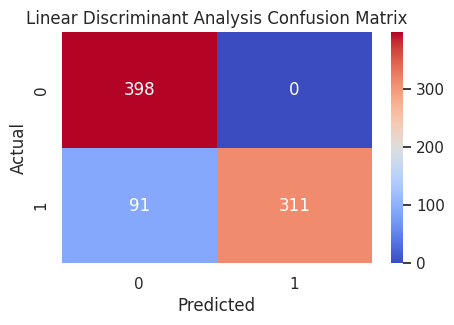


=== Gaussian Process Classifier ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       398
           1       1.00      0.93      0.96       402

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.97      0.96      0.96       800



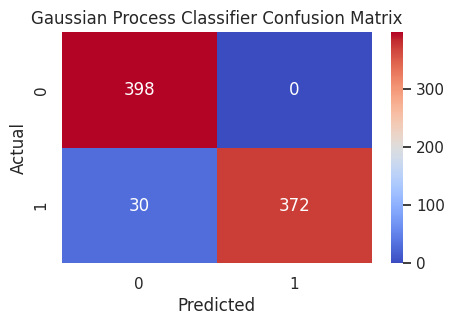


=== MLP Classifier ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       402

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



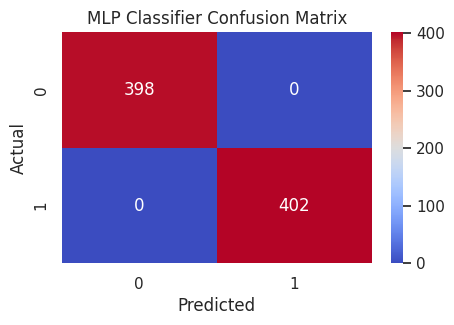


=== Nu-SVC ===
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       398
           1       1.00      0.72      0.83       402

    accuracy                           0.86       800
   macro avg       0.89      0.86      0.85       800
weighted avg       0.89      0.86      0.85       800



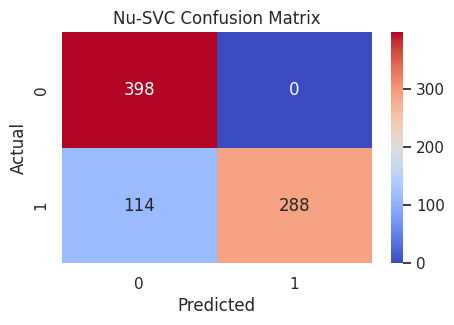

<ipython-input-18-98a60ff029e8>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=list(sorted_performance.keys()), y=list(sorted_performance.values()), palette='viridis')


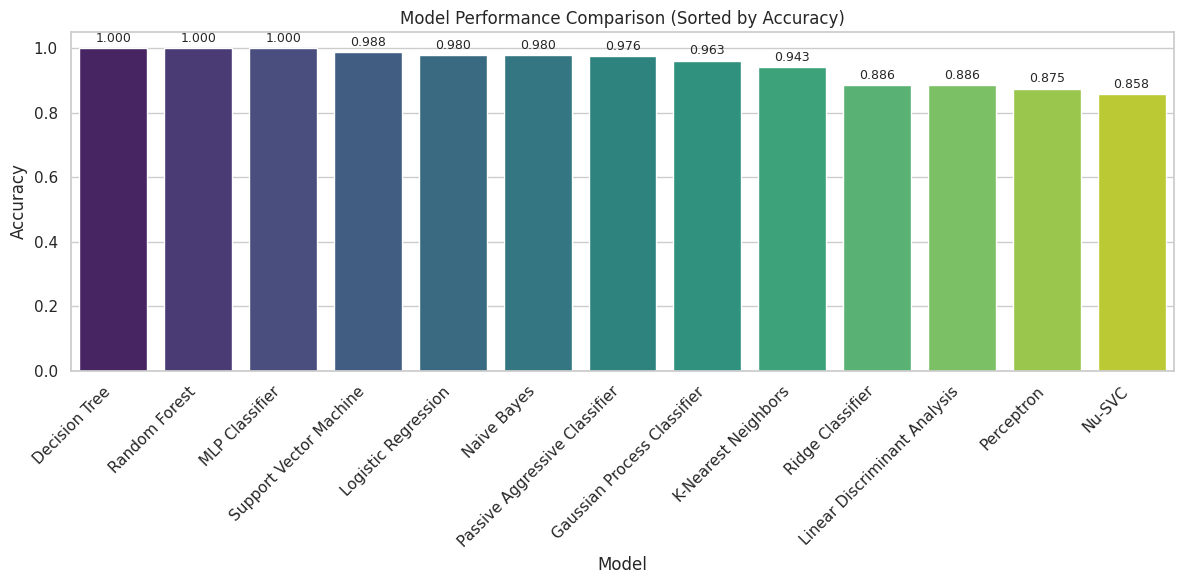

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset
file_path = '/content/Student_Engagement.xlsx'
df = pd.read_excel(file_path)

# Features and label
features = ["drowsiness", "head_posture", "facial_expressions", "subject", "time", "day"]
X = df[features]
y = df["interested"]

# Encode categorical features and label
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(random_state=42),
    "Perceptron": Perceptron(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gaussian Process Classifier": GaussianProcessClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=1000),
    "Nu-SVC": NuSVC(random_state=42)
}

# Dictionary to store accuracy scores
model_performance = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Classification Report
    print(classification_report(y_test, predictions))

    # Store accuracy score
    model_performance[name] = accuracy_score(y_test, predictions)

    # Confusion Matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Sort models by accuracy in descending order
sorted_performance = dict(sorted(model_performance.items(), key=lambda x: x[1], reverse=True))

# Plot bar graph with accuracy values on bars
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=list(sorted_performance.keys()), y=list(sorted_performance.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Performance Comparison (Sorted by Accuracy)')
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
        height + 0.01,                      # y position (slightly above bar)
        f'{height:.3f}',                   # accuracy value, formatted to 3 decimal places
        ha='center', va='bottom',          # center horizontally, bottom vertically
        fontsize=9
    )

plt.tight_layout()
plt.show()

<ipython-input-8-ae497e73182c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='interested', palette='Set2')


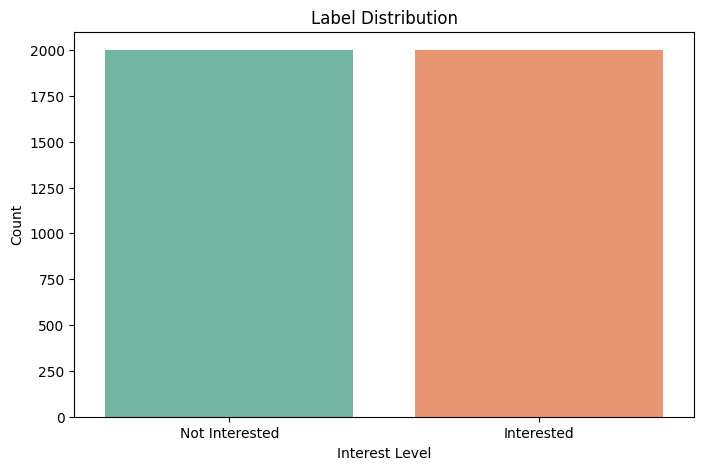

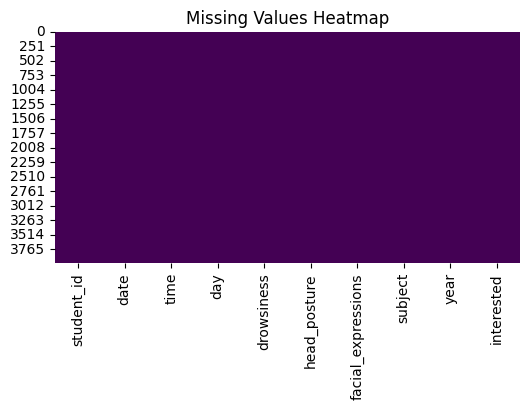

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel("/content/Student_Engagement.xlsx")

# Label Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='interested', palette='Set2')
plt.title('Label Distribution')
plt.xlabel('Interest Level')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


<Axes: xlabel='drowsiness', ylabel='count'>

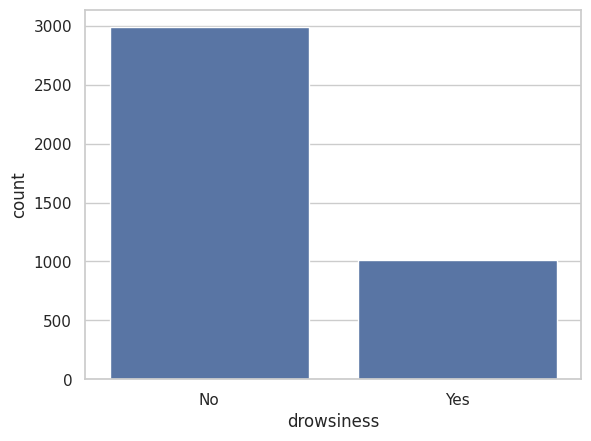

In [ ]:
sns.countplot(data=df, x='drowsiness')


<Axes: xlabel='day', ylabel='count'>

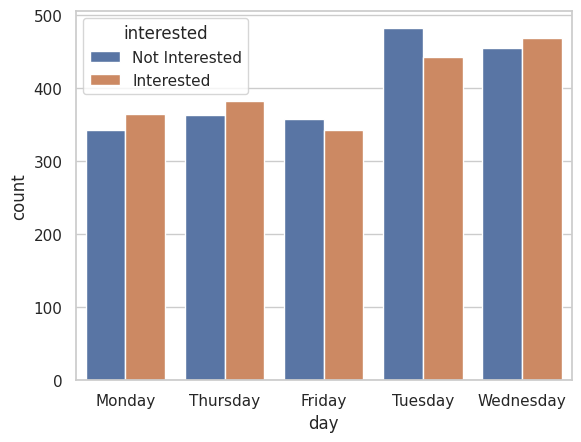

In [ ]:
sns.countplot(data=df, x='day', hue='interested')


<Axes: xlabel='subject', ylabel='count'>

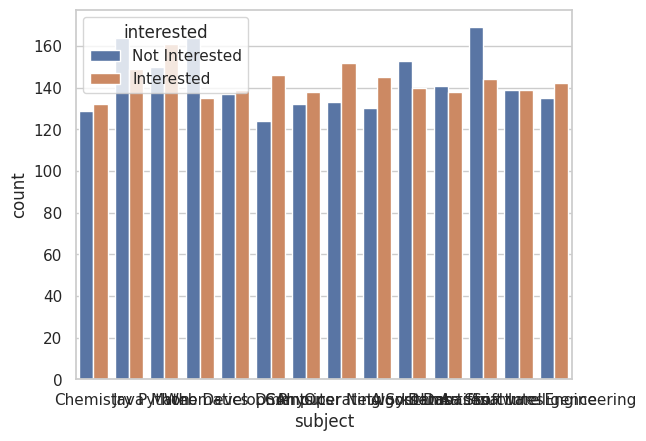

In [ ]:
sns.countplot(data=df, x='subject', hue='interested')


<Axes: xlabel='facial_expressions', ylabel='count'>

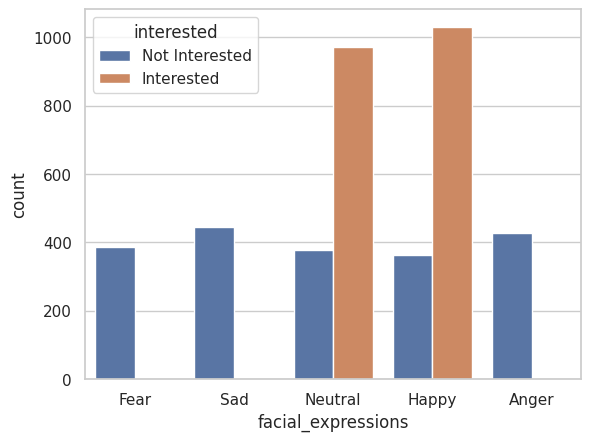

In [ ]:
sns.countplot(data=df, x='facial_expressions', hue='interested')


<ipython-input-25-72a014843da8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_polarity.values, y=avg_polarity.index, palette='coolwarm')


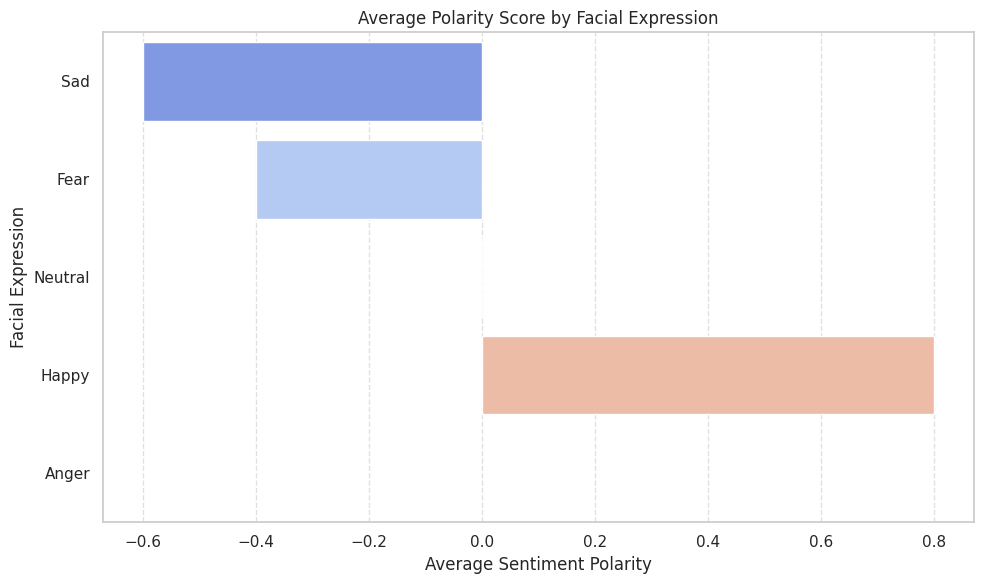

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define polarity scores for each facial expression
polarity_map = {
    "Happy": 0.8,
    "Neutral": 0.0,
    "Fear": -0.4,
    "Sad": -0.6,
    "Angry": -0.7,
    "Surprise": 0.3,
    "Disgust": -0.5
}

# Map polarity to the DataFrame
df['polarity'] = df['facial_expressions'].map(polarity_map)

# Group by facial expressions and calculate average polarity
avg_polarity = df.groupby('facial_expressions')['polarity'].mean().sort_values()

# Plot the average polarity per facial expression
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_polarity.values, y=avg_polarity.index, palette='coolwarm')
plt.title("Average Polarity Score by Facial Expression")
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Facial Expression")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


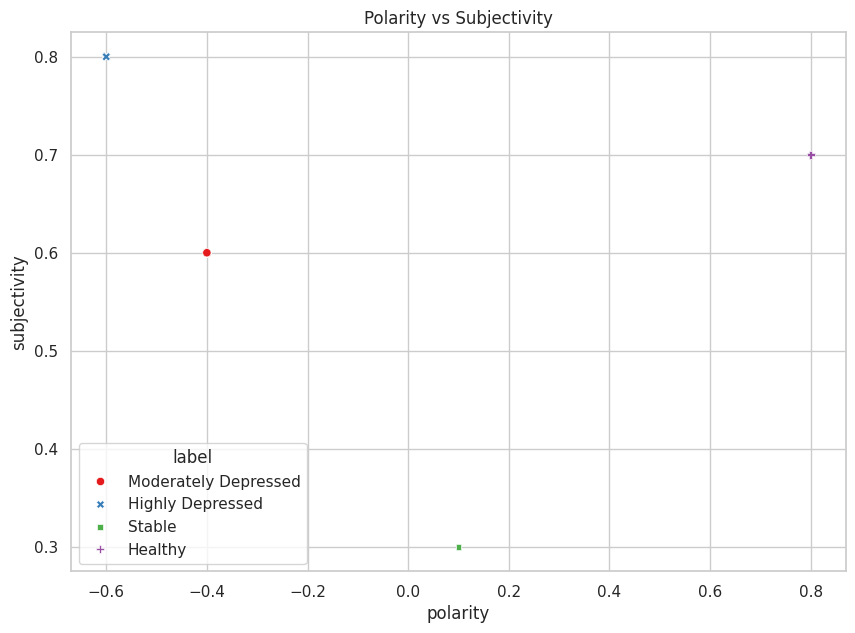

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "Student_Engagement.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Sample polarity and subjectivity mapping for facial expressions
polarity_map = {
    "Happy": 0.8,
    "Neutral": 0.1,
    "Fear": -0.4,
    "Sad": -0.6,
    "Angry": -0.7,
    "Surprise": 0.4,
    "Disgust": -0.5
}

subjectivity_map = {
    "Happy": 0.7,
    "Neutral": 0.3,
    "Fear": 0.6,
    "Sad": 0.8,
    "Angry": 0.9,
    "Surprise": 0.5,
    "Disgust": 0.85
}

# Map scores
df['polarity'] = df['facial_expressions'].map(polarity_map)
df['subjectivity'] = df['facial_expressions'].map(subjectivity_map)

# Assign label based on polarity range
def label_emotion(p):
    if p > 0.6:
        return "Healthy"
    elif 0.2 < p <= 0.6:
        return "Mild Stress"
    elif -0.2 <= p <= 0.2:
        return "Stable"
    elif -0.5 <= p < -0.2:
        return "Moderately Depressed"
    else:
        return "Highly Depressed"

df['label'] = df['polarity'].apply(label_emotion)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='label', style='label', palette='Set1')
plt.title("Polarity vs Subjectivity")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Head Posture vs Interest Level')

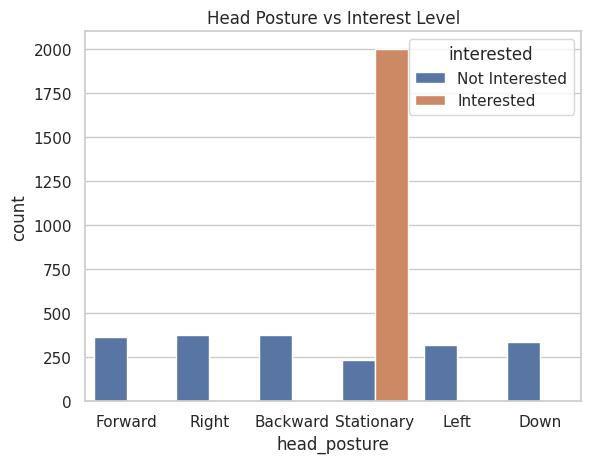

In [ ]:
sns.countplot(data=df, x='head_posture', hue='interested')
plt.title('Head Posture vs Interest Level')


Text(0.5, 1.0, 'Drowsiness vs Interest Level')

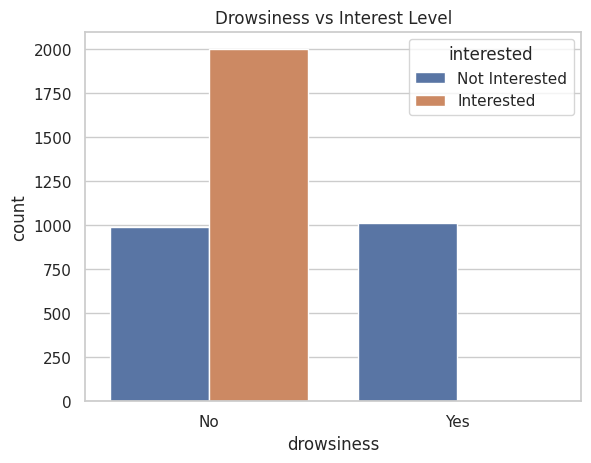

In [ ]:
sns.countplot(data=df, x='drowsiness', hue='interested')
plt.title('Drowsiness vs Interest Level')


Text(0.5, 1.0, 'Year-wise Interest Level')

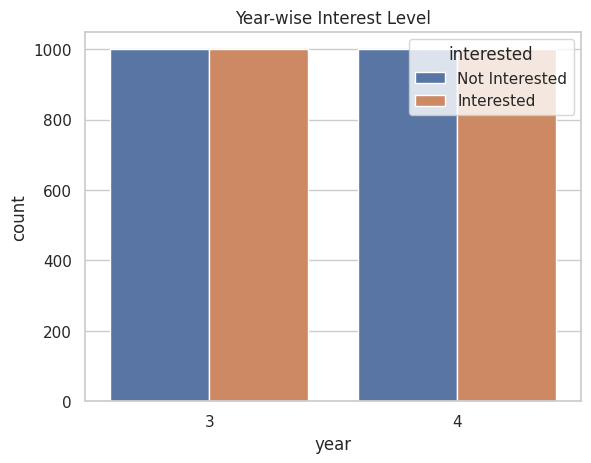

In [ ]:
sns.countplot(data=df, x='year', hue='interested')
plt.title('Year-wise Interest Level')


Text(0.5, 1.0, 'Time of Day vs Interest Level')

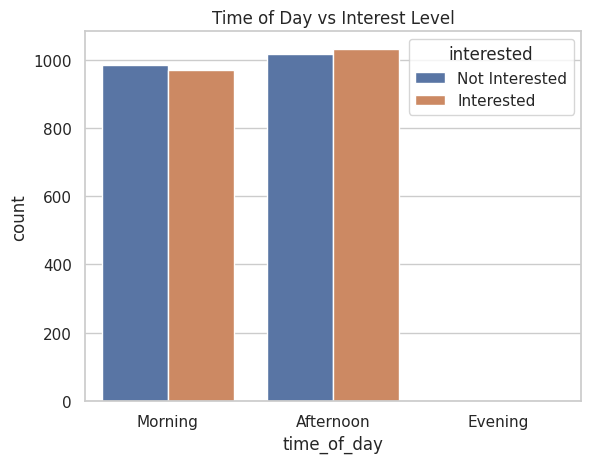

In [ ]:
# Convert to time period (e.g., 'Morning', 'Afternoon', 'Evening')
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour
df['time_of_day'] = pd.cut(df['hour'], bins=[0, 12, 17, 24], labels=['Morning', 'Afternoon', 'Evening'])

sns.countplot(data=df, x='time_of_day', hue='interested')
plt.title('Time of Day vs Interest Level')
